# Airbnb listing Broward County, FL

Task 6.5 Clusters

Contents:

1. Importing libraries and Data
2. Data cleaning
3. The elbow technique
4. k-means clustering

## 1 Importing libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [124]:
df_airbnb = pd.read_csv(r'D:\CareerFoundry\Data Immersion\Task 6\AirBnB Broward County FL Data\02 Data\Prepared data\2021_09 Airbnb Broward County_wrangled for distance to the beach.csv')

In [125]:
df_airbnb.head()

,property_id,collection_date,listing_name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,-80.0728500,distance_to_beach
0,57818,2021_09,Private house close to the beach!,275948,Hollywood,26.01670,-80.12437,Entire home/apt,191,2,55,8/1/2021,0.56,1,359,14,-80.07285,0.05152
1,69824,2021_09,2 bd/2ba Oceanfront Condo,351303,Hallandale Beach,25.97641,-80.12052,Entire home/apt,110,30,2,3/27/2021,0.05,2,201,1,-80.07285,0.04767
2,83449,2021_09,MARY POP APTS 2/1 APT SLEEP 5,454736,Dania Beach,26.03392,-80.14201,Entire home/apt,99,7,20,1/26/2020,0.17,8,119,0,-80.07285,0.06916
3,105411,2021_09,House in the Ranches,532930,Southwest Ranches,26.04678,-80.36809,Entire home/apt,235,4,5,8/27/2012,0.05,1,116,0,-80.07285,0.29524
4,129061,2021_09,MIAMI - LUXURY APARTMENT OVER BEACH,637272,Hollywood,25.99332,-80.11887,Entire home/apt,250,20,18,3/26/2021,0.16,6,364,3,-80.07285,0.04602


## 2. Data cleaning

In [126]:
# Renaming columns

df_airbnb.rename(columns = {'-80.0728500' : 'beach_longitude'}, inplace = True)

In [127]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11950 entries, 0 to 11949
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   property_id                     11950 non-null  int64  
 1   collection_date                 11950 non-null  object 
 2   listing_name                    11950 non-null  object 
 3   host_id                         11950 non-null  int64  
 4   neighbourhood                   11950 non-null  object 
 5   latitude                        11950 non-null  float64
 6   longitude                       11950 non-null  float64
 7   room_type                       11950 non-null  object 
 8   price                           11950 non-null  int64  
 9   minimum_nights                  11950 non-null  int64  
 10  number_of_reviews               11950 non-null  int64  
 11  last_review                     9500 non-null   object 
 12  reviews_per_month               

In [128]:
# Removing categorical columns from the set

df_airbnb.drop(columns = ['property_id','collection_date', 'listing_name', 'host_id','neighbourhood', 'room_type', 'last_review' ], inplace = True)

In [129]:
df_airbnb.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beach_longitude,distance_to_beach
0,26.01670,-80.12437,191,2,55,0.56,1,359,14,-80.07285,0.05152
1,25.97641,-80.12052,110,30,2,0.05,2,201,1,-80.07285,0.04767
2,26.03392,-80.14201,99,7,20,0.17,8,119,0,-80.07285,0.06916
3,26.04678,-80.36809,235,4,5,0.05,1,116,0,-80.07285,0.29524
4,25.99332,-80.11887,250,20,18,0.16,6,364,3,-80.07285,0.04602


In [130]:
# Replacing Nans with 0

df_airbnb.isnull().sum()

latitude                             0
longitude                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 2450
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
beach_longitude                      0
distance_to_beach                    0
dtype: int64

In [131]:
df_airbnb ['reviews_per_month'] = df_airbnb ['reviews_per_month'].fillna (0)

In [132]:
df_airbnb.isnull().sum()

latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
beach_longitude                   0
distance_to_beach                 0
dtype: int64

## 3. The elbow technique

In [133]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [134]:
score = [kmeans[i].fit(df_airbnb).score(df_airbnb) for i in range(len(kmeans))] 
# Creates a score that represents 
# A rate of variation for the given cluster option.

score

[-1853101855.2354736,
 -840943546.0601532,
 -553287791.3234569,
 -424985403.34362715,
 -308038527.5743092,
 -248654476.57938156,
 -211841764.45024046,
 -187692731.434502,
 -168735386.37935057]

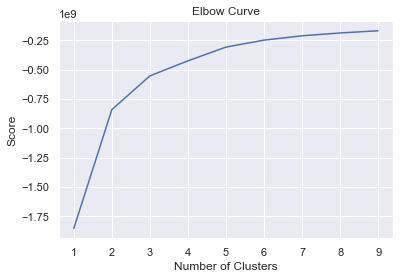

In [135]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Comment:

The breaking point of the curve is around 3 on the x-axis, then it rises only slightly after three, which can indicate that optimal count for the clusters is 3

## 4. k-means clustering

In [136]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [137]:
# Fit the k-means object to the data.

kmeans.fit(df_airbnb)

C:\Users\shwal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [138]:
df_airbnb['clusters'] = kmeans.fit_predict(df_airbnb)

C:\Users\shwal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [139]:
df_airbnb.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beach_longitude,distance_to_beach,clusters
0,26.01670,-80.12437,191,2,55,0.56,1,359,14,-80.07285,0.05152,0
1,25.97641,-80.12052,110,30,2,0.05,2,201,1,-80.07285,0.04767,0
2,26.03392,-80.14201,99,7,20,0.17,8,119,0,-80.07285,0.06916,0
3,26.04678,-80.36809,235,4,5,0.05,1,116,0,-80.07285,0.29524,0
4,25.99332,-80.11887,250,20,18,0.16,6,364,3,-80.07285,0.04602,0


In [140]:
df_airbnb['clusters'].value_counts()

0    10942
1      938
2       70
Name: clusters, dtype: int64

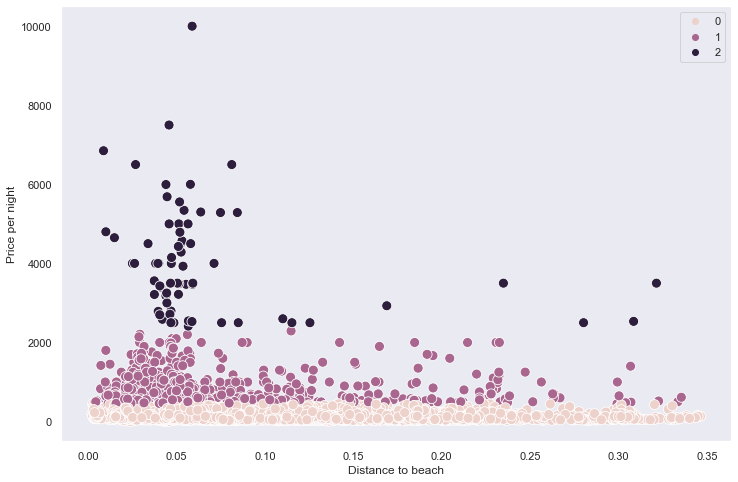

In [141]:
# Scatterplot 'distance_to_beach' and 'price'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_airbnb['distance_to_beach'], y=df_airbnb['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Distance to beach') # Label x-axis.
plt.ylabel('Price per night') # Label y-axis.
plt.show()

Comment:

The cluster coded as "0' with the lighest color is the most populated cluster. The darkest color represent the least populated cluster "2". There is no visible linear connection between these variable but the rental properties with highest prices are in the closest distance to the beach. Also places with medium high prices are clustered in the closer areas to the beach. The lowest priced rentals are distributed across all the distances.

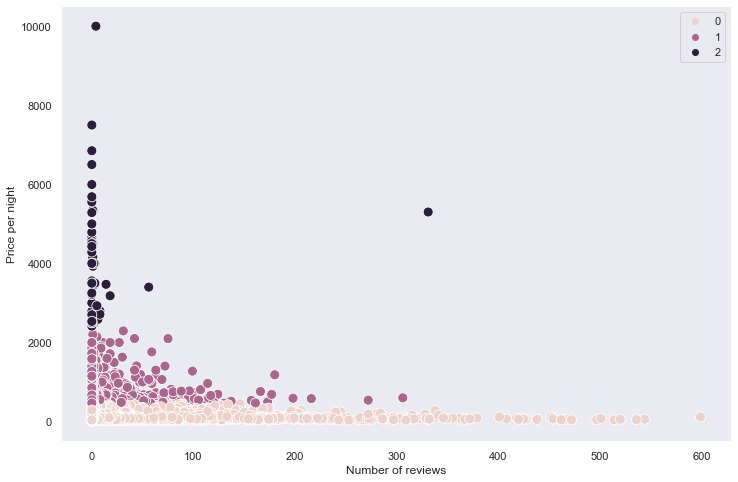

In [142]:
# Scatterplot 'number_of reviews' and 'price'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_airbnb['number_of_reviews'], y=df_airbnb['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of reviews') # Label x-axis.
plt.ylabel('Price per night') # Label y-axis.
plt.show()

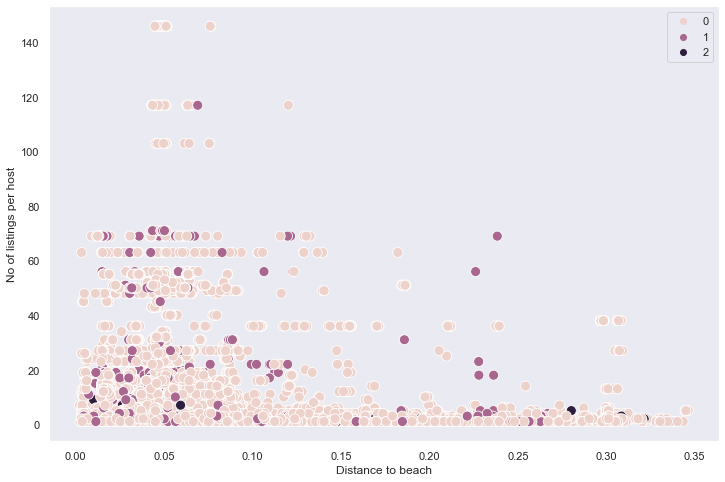

In [146]:
# Scatterplot 'calculated_host_listings_count' and 'distance_to_beach'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_airbnb['distance_to_beach'], y=df_airbnb['calculated_host_listings_count'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Distance to beach') # Label x-axis.
plt.ylabel('No of listings per host') # Label y-axis.
plt.show()

## 5. Descriptive statistics

In [143]:
df_airbnb.loc[df_airbnb['clusters'] == 2, 'cluster'] = 'dark purple'
df_airbnb.loc[df_airbnb['clusters'] == 1, 'cluster'] = 'pink'
df_airbnb.loc[df_airbnb['clusters'] == 0, 'cluster'] = 'cream'

In [145]:
df_airbnb.groupby('cluster').agg({'price':['mean', 'median'], 
                         'distance_to_beach':['mean', 'median'], 
                         'number_of_reviews':['mean', 'median'],
                          'minimum_nights':['mean', 'median']})

price         distance_to_beach            \
                    mean  median              mean    median   
cluster                                                        
cream         158.002193   136.0          0.073086  0.052575   
dark purple  4002.014286  3529.5          0.066797  0.051135   
pink          742.462687   600.0          0.066043  0.048920   

            number_of_reviews        minimum_nights         
                         mean median           mean median  
cluster                                                     
cream               25.529702    8.0       5.906416    2.0  
dark purple          6.857143    0.0       4.757143    3.0  
pink                16.110874    4.0       4.892324    3.0

Comment:
    
The cream cluster with average prices of $158 has the highest median in number of reviews out of the 3 clusters. The distance to the beach seems not matter a lot as all 3 clusters have similar median. The minimum nights stay also doesn't mean much and it looks like this factor has almost no influence on the price per night.

As already explored previously, none of the factors from the data set has a significant impact on the prices and it is also hard to find any meaningful correlation between other components. I think it would be useful to narrow down the set to properties within the price range of $50-500 to try to find some significant relations. I wish to have more info about the type of rental separated into houses and apartments as currently they are cumulated in one group. The location close to the beach seems obvious in a county on the Atlantic Ocean but other factors like proximity to towns center, airports or other significant places may play a role. The concentration on rentals shorter than 7 nights might also reveal some dependencies as local laws forbid rental shorter than 30 days. 

# Trial with the standardization procedures

## STANDARDIZING THE DATA following instructions from:
https://365datascience.com/tutorials/python-tutorials/pca-k-means/

In [34]:
# Importing additional libraries

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sns.set()

In [100]:
df_segmentation = df_airbnb

In [101]:
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11950 entries, 0 to 11949
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        11950 non-null  float64
 1   longitude                       11950 non-null  float64
 2   price                           11950 non-null  int64  
 3   minimum_nights                  11950 non-null  int64  
 4   number_of_reviews               11950 non-null  int64  
 5   reviews_per_month               11950 non-null  float64
 6   calculated_host_listings_count  11950 non-null  int64  
 7   availability_365                11950 non-null  int64  
 8   number_of_reviews_ltm           11950 non-null  int64  
 9   beach_longitude                 11950 non-null  float64
 10  distance_to_beach               11950 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 1.0 MB


Visualize raw data

In [108]:
# change data type in 'distance_to_beach' from float into integer

df_segmentation['price'] = df_segmentation['price'].astype(float)

In [102]:
df_segmentation['minimum_nights'] = df_segmentation['minimum_nights'].astype(float)

In [103]:
df_segmentation['number_of_reviews'] = df_segmentation['number_of_reviews'].astype(float)

In [104]:
df_segmentation['calculated_host_listings_count'] = df_segmentation['calculated_host_listings_count'].astype(float)

In [105]:
df_segmentation['availability_365'] = df_segmentation['availability_365'].astype(float)

In [106]:
df_segmentation['number_of_reviews_ltm'] = df_segmentation['number_of_reviews_ltm'].astype(float)

In [109]:
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11950 entries, 0 to 11949
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        11950 non-null  float64
 1   longitude                       11950 non-null  float64
 2   price                           11950 non-null  float64
 3   minimum_nights                  11950 non-null  float64
 4   number_of_reviews               11950 non-null  float64
 5   reviews_per_month               11950 non-null  float64
 6   calculated_host_listings_count  11950 non-null  float64
 7   availability_365                11950 non-null  float64
 8   number_of_reviews_ltm           11950 non-null  float64
 9   beach_longitude                 11950 non-null  float64
 10  distance_to_beach               11950 non-null  float64
dtypes: float64(11)
memory usage: 1.0 MB


Text(0.5, 1.0, 'Visualization of raw data')

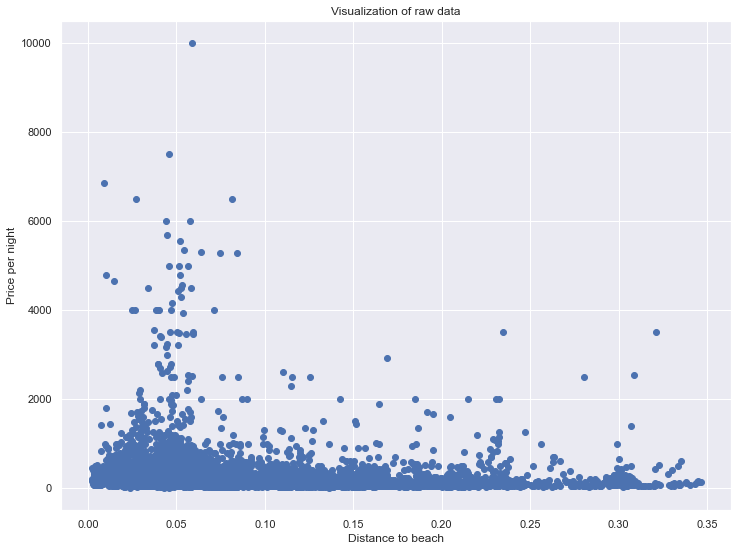

In [110]:
# Plot the data. 
# Data point will bbe scattered across 'price' and 'distance_to_beach', located on positions 2 i 10

plt.figure(figsize = (12, 9))
plt.scatter(df_segmentation.iloc[:,10], df_segmentation.iloc[:,2])
plt.xlabel('Distance to beach')
plt.ylabel('Price per night')
plt.title('Visualization of raw data')

the graph represents all points in the set, which our K-means algorithm will aim to segment

# Data Preprocessing
Distance to beach is from 0 to 0.35, whereas Price per night is from 0 to 10,000, which points to a vast difference between the range of these values. Therefore, I must first standardize the data.

In [111]:
# Standardization

scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

Dimensionality Reduction with PCA

In [112]:
# fit standardized data using PCA

pca = PCA()
pca.fit(segmentation_std)

PCA()

In [113]:
# decide how many features to keep based on the cumulative variance plot

# the attribute shows how much variance is explained by each of the components

pca.explained_variance_ratio_

array([2.16131482e-01, 2.01634462e-01, 1.21921798e-01, 1.02826681e-01,
       9.88629824e-02, 8.95812643e-02, 7.37052634e-02, 6.99811847e-02,
       2.53548822e-02, 2.32528114e-17, 0.00000000e+00])

Text(0.5, 1.0, 'Explained Variance by Components')

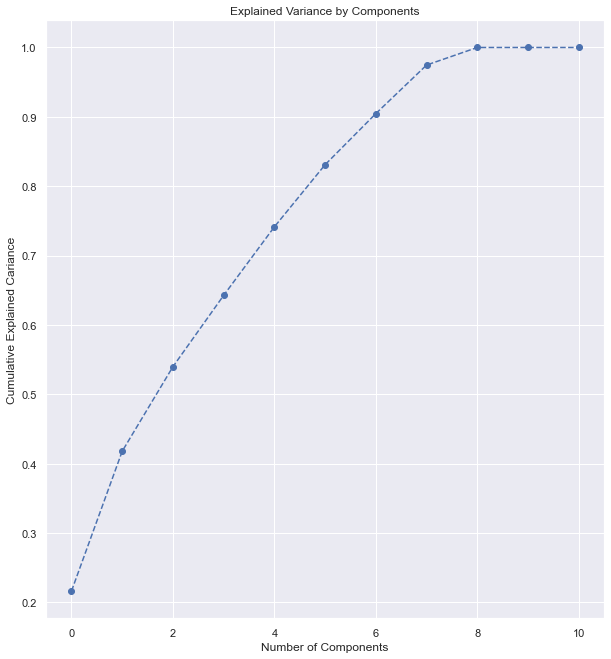

In [115]:
plt.figure(figsize = (10, 11))
plt.plot(range(0,11), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Cariance')
plt.title('Explained Variance by Components')

The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 6 components.

In [116]:
# I choose 6 components

pca = PCA(n_components = 6)

In [117]:
# Fit the model to data with the selected number of components

pca.fit(segmentation_std)

PCA(n_components=6)

In [118]:
# I only need the calculated resulting components scores for the elements in dataset

pca.transform(segmentation_std)

array([[ 0.40944072,  0.05283025,  0.75151373,  0.83057444,  0.21360313,
        -0.81619954],
       [-0.5495259 , -0.86321867,  0.07540107,  0.26365722,  1.50248038,
         0.53461194],
       [-0.4947219 , -0.31944776, -0.16849853, -0.66978106,  0.28613686,
         0.44262951],
       ...,
       [-0.4059027 , -1.0721795 ,  1.14775108,  0.39952531,  0.19710499,
        -0.83681932],
       [-0.64629329, -0.79923971,  0.56831957,  0.76751538, -0.08969095,
        -0.81871161],
       [-1.28451297,  0.08725978,  0.28747284, -1.25175809,  0.0955085 ,
         0.58491437]])

In [119]:
scores_pca = pca.transform(segmentation_std)

In [ ]:
# incorporating the newly obtained PCA scores in the K-means algorithm

In [120]:
# how to combine PCA and K-means clustering

# testing algorithm with up to 20 clusters

wcss = []
for i in range(0,20):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.intertia_)

C:\Users\shwal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:94: RuntimeWarning: divide by zero encountered in log
  n_local_trials = 2 + int(np.log(n_clusters))


OverflowError: cannot convert float infinity to integer

In [ ]:
# I tried many steps to remove this error but failed.